# Analyzation 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Default.csv")
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [3]:
df.shape

(10000, 4)

In [4]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


# Visualization

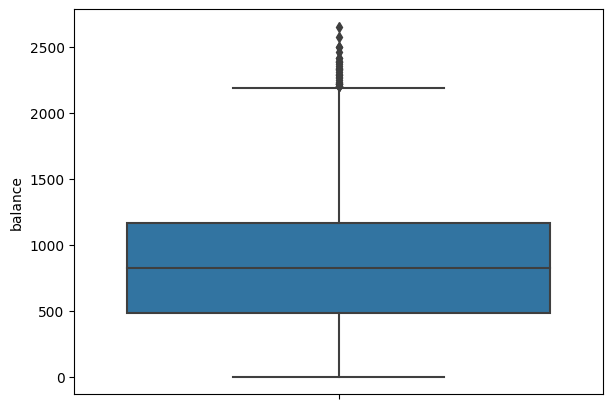

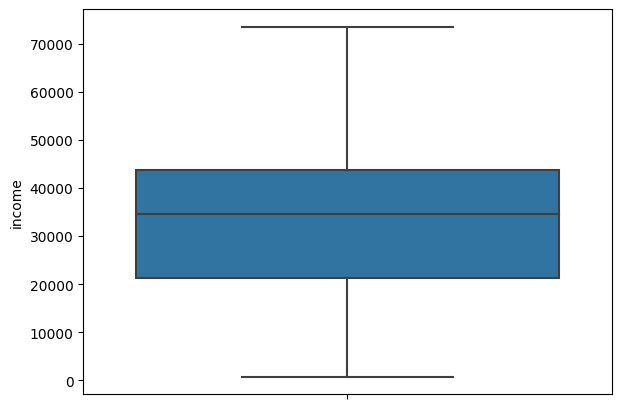

In [5]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y = df['balance'])

plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.boxplot(y = df['income'])

plt.show()

In [6]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [7]:
df['default'].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

In [8]:
df['student'].value_counts()

student
No     7056
Yes    2944
Name: count, dtype: int64

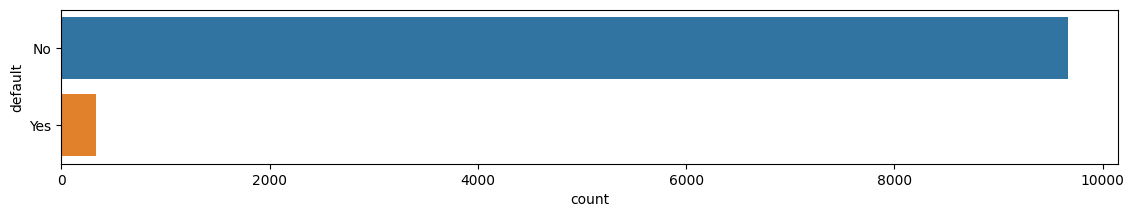

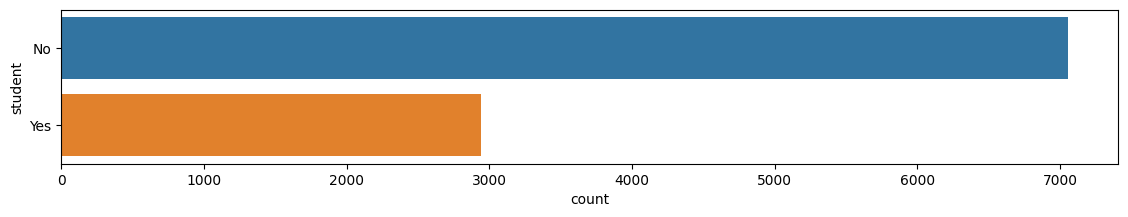

In [9]:

plt.figure(figsize= (30,2))
plt.subplot(1,2,1)
sns.countplot(y=df['default'])
plt.show()


plt.figure(figsize= (30,2))
plt.subplot(1,2,2)
sns.countplot(y=df['student'])
plt.show()

In [10]:
df['default'].value_counts(normalize= True)

default
No     0.9667
Yes    0.0333
Name: proportion, dtype: float64

In [11]:
df['student'].value_counts(normalize= True)
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


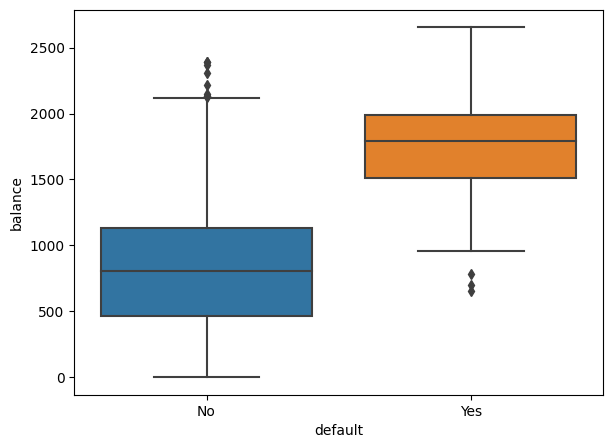

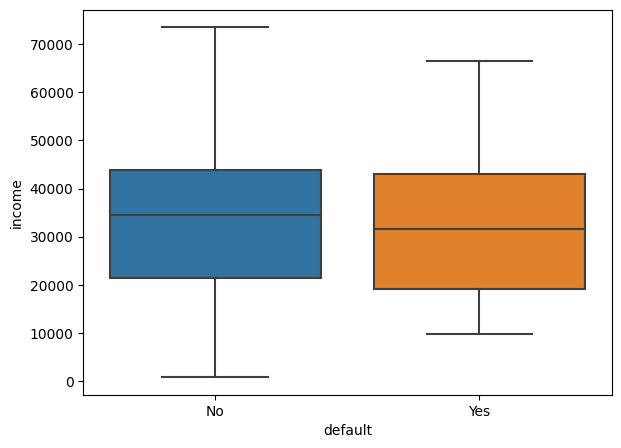

In [12]:
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
sns.boxplot(x= df['default'], y= df['balance'])
plt.show()

plt.figure(figsize= (15,5))
plt.subplot(1,2,2)
sns.boxplot(x= df['default'], y= df['income'])
plt.show()

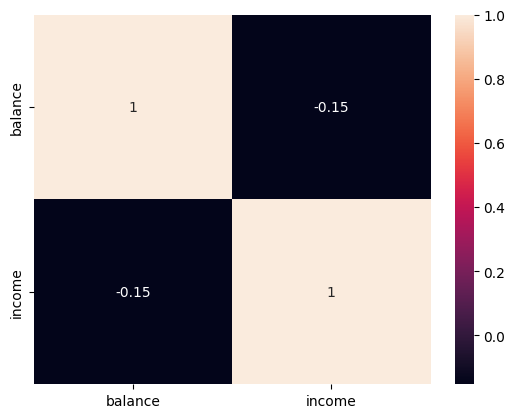

In [13]:
sns.heatmap(df[['balance', 'income']].corr(), annot=True)
plt.show()

In [14]:
df.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [15]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [16]:
q1, q3 = df['balance'].quantile([.25, .75])
iqr = q3- q1
ll = q1- 1.5*(iqr)
ul = q3+ 1.5*(iqr)
ul

2193.1743086078154

In [17]:
(df['balance']>ul).value_counts()

balance
False    9969
True       31
Name: count, dtype: int64

In [18]:
df['balance'] = np.where(df['balance']>ul, ul, df['balance'])

In [19]:
(df['balance']>ul).value_counts()

balance
False    10000
Name: count, dtype: int64

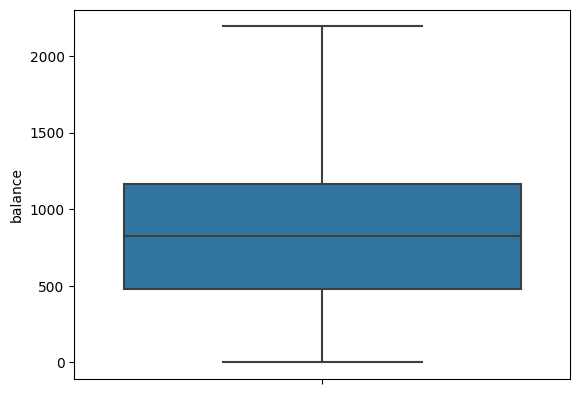

In [20]:
sns.boxplot(y = df['balance'])
plt.show()

# Logistic Regression Model

In [21]:
df = pd.get_dummies(df)
df.head()

,balance,income,default_No,default_Yes,student_No,student_Yes
0,729.526495,44361.625074,True,False,True,False
1,817.180407,12106.134700,True,False,False,True
2,1073.549164,31767.138947,True,False,True,False
3,529.250605,35704.493935,True,False,True,False
4,785.655883,38463.495879,True,False,True,False


In [22]:
df.columns = ['balance', 'income', 'default no', 'deafult yes', 'student no', 'student yes']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x = df.drop('default no', axis= 1)
y = df['default no']

In [25]:
x_train, x_test, y_train,  y_test = train_test_split(x, y, test_size= 0.3, random_state = 21, stratify= y)

In [26]:
x_train.shape

(7000, 5)

In [27]:
x_test.shape

(3000, 5)

In [28]:
# sm = SMOTE(random_state= 33, sampling_strategy= 0.75)
# oversample = SMOTE()
# x_res, y_res = oversample.fit_sample(x_train, y_train)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [31]:
y_pred = lr.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
confusion_matrix(y_test, y_pred)

array([[   0,  100],
       [   0, 2900]], dtype=int64)

In [34]:
(2889+34)/((2889+34)+11+66)

0.9743333333333334